In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.naive_bayes import GaussianNB

In [2]:
train = pd.read_csv("data/train.csv")

pandas.core.frame.DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Plotting:


- matplotlib
- seaborn
- altair


Machine Learning

- Scikit learn (classification -> supervised learning)
   * Naive Bayes
   * Decision Trees
   * Support Vector Machine (SVM)
   * Nearest Neighbors
  

# Tim Starting to Play Around with the Data using pandas

### use head() and describe to get an idea of what the data looks like

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


     Run correlation with Survived Column to see if any other categories are closely related
    Categories of interest are Pclass, Age, SibSp, Parch, and Fare

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


    Noted sex, ticket, cabin and embark were left out of the correlation matrix. Not too interested in ticket and embarked, 
    really interested in sex, possibly cabin location could affect surival?

In [16]:
train.corrwith(train['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

    Nothing terribly profound when looking at the correlations of categories with Survived. Weak negative correlation with Pclass 
    and weak positive correlation with Fare
    

In [17]:
categories = train.columns
cat_of_interest = categories.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Age','Fare']) #need to bucket Age and Fare

In [19]:
for category in cat_of_interest:
    average = train.groupby([category])
    print(average.mean())
    


          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408
        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550
        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female 

In [23]:
bins = pd.cut(train['Age'], np.arange(0,90,10)) #could use np.arange for the age list

In [25]:
means=train.groupby([bins, 'Sex']).mean()
means

PassengerId  Survived    Pclass        Age     SibSp  \
Age      Sex                                                            
(0, 10]  female   421.838710  0.612903  2.677419   4.596774  1.483871   
         male     439.303030  0.575758  2.606061   3.959697  2.181818   
(10, 20] female   412.478261  0.739130  2.260870  16.793478  0.652174   
         male     471.115942  0.144928  2.710145  17.666667  0.550725   
(20, 30] female   441.419753  0.753086  2.135802  25.382716  0.481481   
         male     421.758389  0.154362  2.523490  25.446309  0.234899   
(30, 40] female   416.800000  0.836364  1.818182  35.327273  0.545455   
         male     497.230000  0.230000  2.240000  34.900000  0.280000   
(40, 50] female   500.709677  0.677419  1.838710  45.548387  0.387097   
         male     473.800000  0.218182  1.963636  45.272727  0.363636   
(50, 60] female   503.571429  0.928571  1.214286  55.142857  0.642857   
         male     422.928571  0.142857  1.678571  54.767857  0.142857   
(60, 70] female   530.000000  1.000000  1.666667  62.666667  0.333333   
         male     409.642857  0.071429  1.500000  64.142857  0.142857   
(70, 80] female          NaN       NaN       NaN        NaN       NaN   
         male     438.200000  0.200000  1.800000  73.300000  0.000000   

                    Parch       Fare  
Age      Sex                          
(0, 10]  female  1.451613  27.849326  
         male    1.393939  32.862879  
(10, 20] female  0.500000  40.659063  
         male    0.318841  22.109843  
(20, 30] female  0.543210  41.563991  
         male    0.073826  21.099745  
(30, 40] female  0.654545  62.090529  
         male    0.250000  31.719164  
(40, 50] female  1.000000  56.868823  
         male    0.109091  32.310911  
(50, 60] female  0.428571  69.522321  
         male    0.250000  32.401043  
(60, 70] female  0.000000  55.848600  
         male    0.428571  43.781250  
(70, 80] female       NaN        NaN  
         male    0.000000  25.936680

28.343689655172415

In [72]:
for Index in train.columns:
    print(Index)


PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [53]:
mean_df = train.groupby(["Survived"]).mean()
count_df = train.groupby(["Survived"]).count()
variance_df = train.groupby(["Survived"]).var()

z_scores = {}

for index in mean_df.columns:

    z_scores[index] = (mean_df.loc[0,index] - mean_df.loc[1,index])/((variance_df.loc[0,index]/count_df.loc[0,index]) + (variance_df.loc[1,index]/count_df.loc[1,index])**(.5))

pd.DataFrame(z_scores, index = [ 'z_score'])


,PassengerId,Pclass,Age,SibSp,Parch,Fare
z_score,0.019274,12.200408,1.688669,1.936141,-3.147356,-4.870064


In [34]:
for column in z_scores:
    print (column , st.norm.cdf(z_scores[column]))



PassengerId 0.5076887018979982
Pclass 1.0
Age 0.9543585829486193
SibSp 0.9735747581130731
Parch 0.0008237700120273245
Fare 5.578115130410865e-07


In [36]:
z_scores

{'PassengerId': 0.019273910829993687,
 'Pclass': 12.200407589461635,
 'Age': 1.6886692370960543,
 'SibSp': 1.9361405950795452,
 'Parch': -3.147356412727385,
 'Fare': -4.87006365574862}

# Playing around with Seaborn

Trying to make a scatterplot that highlights survivorship based on class and age, facetted by sex
    These plots show how age varies amoung class, survivorship based on 

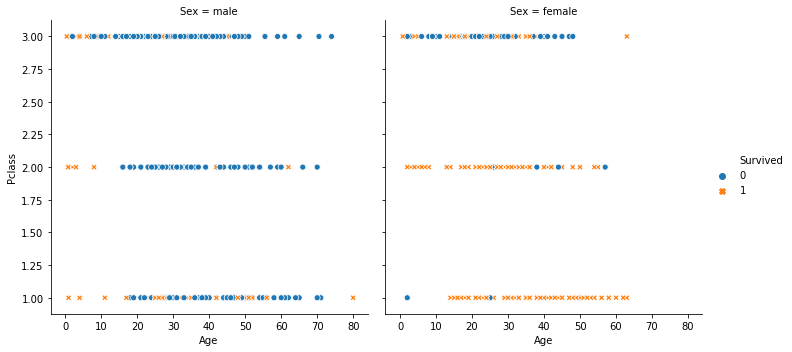

In [43]:
sns.relplot(x="Age", y="Pclass",style = "Survived", height= 5 ,hue = "Survived", col="Sex", data=train);

Based on the above plots, I'm curious if class 1 males had better rate of surviourship thatn class 3 females.
''
Turns out all classes of females had better survivorship than all male classes. Big drop off in survivorship of females from class 2 to 3. Big drop off in males classes 1 to 2

In [52]:
train.pivot_table('Survived',index='Sex',columns='Pclass') 

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [56]:
gnb = GaussianNB()
#y_pred = gnb.fit(train.data, train.target).predict(train.data)
train()

AttributeError: 'DataFrame' object has no attribute 'data'